<a href="https://colab.research.google.com/github/sabzdabz/Data-Analytics-Project/blob/main/Elbow_method_k_mean_cluster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

In [7]:
df = pd.read_csv("/content/customer satification dataset for airline.csv")
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction Rating
0,Male,48,First-time,Business,Business,821,2,5,3,3,...,3,5,2,5,5,5,3,5,5,Satisfied
1,Female,35,Returning,Business,Business,821,26,39,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [8]:
print(df.info(),'\n')
print(df.head(),'\n')
print(df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9342 entries, 0 to 9341
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Gender                                  9342 non-null   object
 1   Age                                     9342 non-null   int64 
 2   Customer Type                           9342 non-null   object
 3   Type of Travel                          9342 non-null   object
 4   Class                                   9342 non-null   object
 5   Flight Distance                         9342 non-null   int64 
 6   Departure Delay in Minutes              9342 non-null   int64 
 7   Arrival Delay in Minutes                9342 non-null   int64 
 8   Departure and Arrival Time Convenience  9342 non-null   int64 
 9   Ease of Online Booking                  9342 non-null   int64 
 10  Check-in Service                        9342 non-null   int64 
 11  Onli

In [14]:
# List of int64 column names to convert
int64_columns = ['Departure and Arrival Time Convenience',
       'Ease of Online Booking', 'Check-in Service', 'Online Boarding',
       'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service',
       'Cleanliness', 'Food and Drink', 'In-flight Service',
       'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

# Convert int64 columns to categorical
df[int64_columns] = df[int64_columns].astype('object')

# Verify the data types of the DataFrame
print(df.dtypes)

Gender                                      object
Age                                       category
Customer Type                               object
Type of Travel                              object
Class                                       object
Flight Distance                           category
Departure Delay in Minutes                   int64
Arrival Delay in Minutes                     int64
Departure and Arrival Time Convenience      object
Ease of Online Booking                      object
Check-in Service                            object
Online Boarding                             object
Gate Location                               object
On-board Service                            object
Seat Comfort                                object
Leg Room Service                            object
Cleanliness                                 object
Food and Drink                              object
In-flight Service                           object
In-flight Wifi Service         

Descriptive Statistics for Categorical Variables

In [ ]:
for col in df.select_dtypes(include='object').columns: #summary of categorical variable we use loop function , loop all the columne who is categorical/object
    print(f"{col}:\n{df[col].value_counts()}\n") # value count no of each category- value count and give frequency/ pull the information from data , "f" is single line function


Gender:
Female    4784
Male      4558
Name: Gender, dtype: int64

Customer Type:
Returning     7641
First-time    1701
Name: Customer Type, dtype: int64

Type of Travel:
Business    6455
Personal    2887
Name: Type of Travel, dtype: int64

Class:
Business        5248
Economy         3534
Economy Plus     560
Name: Class, dtype: int64

Satisfaction Rating:
Neutral              4333
Satisfied            3590
Dissatisfied         1059
Very Satisfied        354
Very Dissatisfied       6
Name: Satisfaction Rating, dtype: int64



change to dummies variables

In [ ]:
df = pd.get_dummies(df, drop_first=True)
print(df)

      Age  Flight Distance  Departure Delay in Minutes  \
0      48              821                           2   
1      35              821                          26   
2      41              853                           0   
3      50             1905                           0   
4      49             3470                           0   
...   ...              ...                         ...   
9337   37              357                         217   
9338    9              457                           0   
9339   20              508                           2   
9340   58              534                           0   
9341   30              534                           0   

      Arrival Delay in Minutes  Departure and Arrival Time Convenience  \
0                            5                                       3   
1                           39                                       2   
2                            0                                       4   
3      

In [ ]:
scaler = MinMaxScaler() # Create a MinMaxScaler object
normalized_data = scaler.fit_transform(df) # Fit the scaler to the data and transform the data
normalized_df = pd.DataFrame(normalized_data, columns=df.columns) # Convert the normalized data back to a DataFrame
normalized_df.head(3)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction Rating_Neutral,Satisfaction Rating_Satisfied,Satisfaction Rating_Very Dissatisfied,Satisfaction Rating_Very Satisfied,cluster
0,0.525641,0.191858,0.001967,0.004946,0.6,0.50,0.75,0.5,0.50,0.5,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5
1,0.358974,0.191858,0.025565,0.038576,0.4,0.25,0.50,1.0,0.25,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5
2,0.435897,0.200000,0.000000,0.000000,0.8,0.75,0.75,1.0,0.75,0.5,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5


In [ ]:
print(df.head(),'\n')
print(df.describe(),'\n')

   Age  Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
0   48              821                           2                         5   
1   35              821                          26                        39   
2   41              853                           0                         0   
3   50             1905                           0                         0   
4   49             3470                           0                         1   

   Departure and Arrival Time Convenience  Ease of Online Booking  \
0                                       3                       3   
1                                       2                       2   
2                                       4                       4   
3                                       2                       2   
4                                       3                       3   

   Check-in Service  Online Boarding  Gate Location  On-board Service  ...  \
0                 4 

In [ ]:
print(df.columns)

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Departure and Arrival Time Convenience',
       'Ease of Online Booking', 'Check-in Service', 'Online Boarding',
       'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service',
       'Cleanliness', 'Food and Drink', 'In-flight Service',
       'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling',
       'Gender_Female', 'Gender_Male', 'Customer Type_First-time',
       'Customer Type_Returning', 'Type of Travel_Business',
       'Type of Travel_Personal', 'Class_Business', 'Class_Economy',
       'Class_Economy Plus', 'Satisfaction Rating_Dissatisfied',
       'Satisfaction Rating_Neutral', 'Satisfaction Rating_Satisfied',
       'Satisfaction Rating_Very Dissatisfied',
       'Satisfaction Rating_Very Satisfied'],
      dtype='object')


In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'sse')

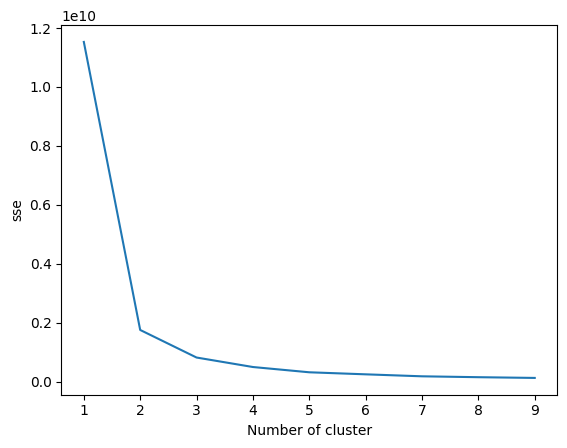

In [ ]:

plt.plot(k_rng,sse)
plt.xlabel('Number of cluster')
plt.ylabel('sse')

In [ ]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_df) # fit k-means object to data
labels = kmeans.labels_ # get cluster assignments for each data point
df['cluster'] = labels # add cluster labels to dataframe
print(df.info(),'\n')
print(df.head(),'\n')
print(df.groupby('cluster').mean())
import matplotlib.pyplot as plt

# Group the DataFrame by 'cluster' column
grouped_df = df.groupby('cluster')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9342 entries, 0 to 9341
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Age                                     9342 non-null   int64
 1   Flight Distance                         9342 non-null   int64
 2   Departure Delay in Minutes              9342 non-null   int64
 3   Arrival Delay in Minutes                9342 non-null   int64
 4   Departure and Arrival Time Convenience  9342 non-null   int64
 5   Ease of Online Booking                  9342 non-null   int64
 6   Check-in Service                        9342 non-null   int64
 7   Online Boarding                         9342 non-null   int64
 8   Gate Location                           9342 non-null   int64
 9   On-board Service                        9342 non-null   int64
 10  Seat Comfort                            9342 non-null   int64
 11  Leg Room Service 